In [7]:
from sklearn.svm import SVC

# SVM Training and Evaluation

Our goal is to train a simple SVM.

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


Load in the train test splits

In [2]:
import numpy as np
X_train = np.load('drive/MyDrive/ML_Final/Upsampled_Data/X_train_upsample_final.npy')
X_validate = np.load('drive/MyDrive/ML_Final/Upsampled_Data/X_validate_upsample_final.npy')
X_test = np.load('drive/MyDrive/ML_Final/Upsampled_Data/X_test_upsample_final.npy')
y_train = np.load('drive/MyDrive/ML_Final/Upsampled_Data/y_train_upsample_final.npy')
y_validate = np.load('drive/MyDrive/ML_Final/Upsampled_Data/y_validate_upsample_final.npy')
y_test = np.load('drive/MyDrive/ML_Final/Upsampled_Data/y_test_upsample_final.npy')

In [3]:
print(np.unique(y_train,return_counts=True))
print(np.unique(y_test,return_counts=True))
print(np.unique(y_validate,return_counts=True))

(array(['anger', 'happiness', 'neutral', 'sadness', 'surprise'],
      dtype='<U9'), array([189, 174, 200, 177, 164]))
(array(['anger', 'happiness', 'neutral', 'sadness', 'surprise'],
      dtype='<U9'), array([75, 73, 57, 57, 75]))
(array(['anger', 'happiness', 'neutral', 'sadness', 'surprise'],
      dtype='<U9'), array([36, 53, 43, 66, 61]))


We now have the data we need to train the SVM. We also need to encode the labels as numeric values.

In [6]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_validate = le.transform(y_validate)
y_test = le.transform(y_test)

In [19]:
clf = SVC(C = 7, gamma = 'scale', decision_function_shape='ovr', kernel = 'poly', degree = 3)
clf.fit(X_train, y_train)
print(clf.score(X_validate, y_validate))
clf.score(X_test, y_test)

0.6563706563706564


0.6350148367952523

We find that an SVM with C = 7, a polynomial kernel of degree 3, and an ovr decision function works best, achieving a validation accuracy of .65 and a test accuracy of .63. 

In [20]:
#Save the model

from joblib import dump, load
dump(clf, 'drive/MyDrive/ML_Final/Models/svm.joblib')

['drive/MyDrive/ML_Final/Models/svm.joblib']

Let's do some analysis of the quality of our model now

In [10]:
from sklearn.metrics import classification_report

In [11]:
y_test_pred = clf.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.57      0.72      0.64        75
           1       0.79      0.77      0.78        73
           2       0.48      0.53      0.50        57
           3       0.49      0.37      0.42        57
           4       0.76      0.68      0.72        75

    accuracy                           0.63       337
   macro avg       0.62      0.61      0.61       337
weighted avg       0.63      0.63      0.63       337



We see that there is a bit of range in the quality of our scores. For example, our scores for class 1 reach into the .70's, however are only in the .40's and .50's for other classes. This suggests that our SVM may not be performing equally well across all classes. Next we can look at the confusion matrix.

In [12]:
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix, classification_report
conf_norm = normalize(confusion_matrix(y_test,y_test_pred), norm="l1")
conf_norm = np.round(conf_norm, 2)
print(conf_norm)


[[0.72 0.04 0.04 0.17 0.03]
 [0.04 0.77 0.08 0.07 0.04]
 [0.18 0.07 0.53 0.05 0.18]
 [0.3  0.11 0.21 0.37 0.02]
 [0.13 0.03 0.15 0.01 0.68]]


CNN confusion matrix for reference:
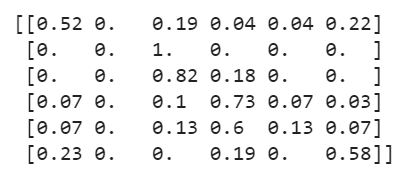


In [14]:
bad_data = []
for i in range(len(y_test)):
  if y_test_pred[i] != y_test[i]:
    #bad_data.append()
    print(i, 'has been classified as ', y_test_pred[i], 'and should be ', y_test[i])

0 has been classified as  3 and should be  1
2 has been classified as  2 and should be  4
5 has been classified as  0 and should be  3
8 has been classified as  0 and should be  4
12 has been classified as  1 and should be  0
19 has been classified as  2 and should be  1
20 has been classified as  2 and should be  0
21 has been classified as  3 and should be  0
33 has been classified as  0 and should be  4
34 has been classified as  2 and should be  1
36 has been classified as  0 and should be  2
39 has been classified as  1 and should be  3
41 has been classified as  1 and should be  3
42 has been classified as  3 and should be  1
43 has been classified as  1 and should be  0
45 has been classified as  1 and should be  0
46 has been classified as  2 and should be  3
48 has been classified as  2 and should be  3
50 has been classified as  2 and should be  3
51 has been classified as  0 and should be  3
52 has been classified as  2 and should be  3
58 has been classified as  0 and shoul

In [15]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores = learning_curve(clf, X_test, y_test)


Let's plot some learning curves now.

In [17]:
#Code taken from https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

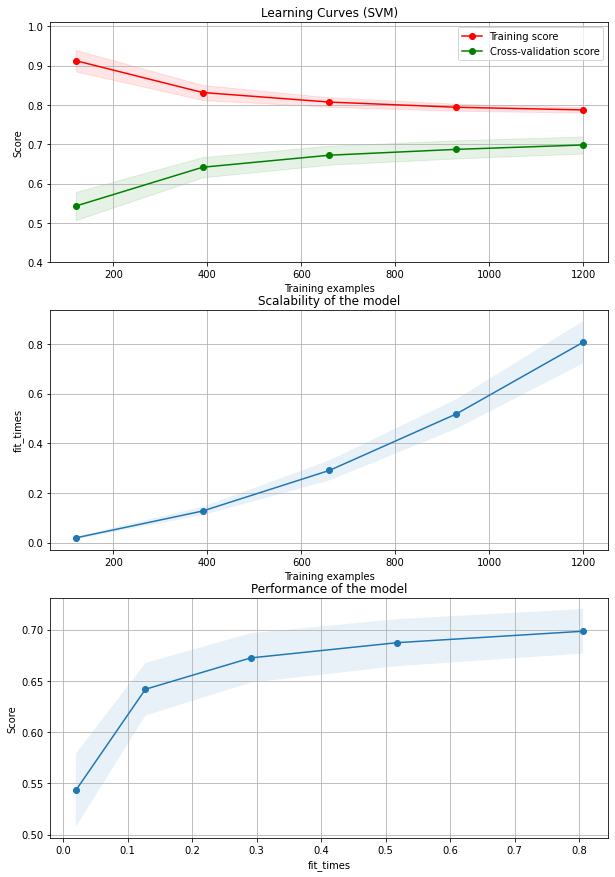

In [18]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

title = "Learning Curves (SVM)"
#estimator = GaussianNB()
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = clf
#estimator = clf

plot_learning_curve(estimator, title, np.concatenate((X_train, X_validate, X_test), axis = 0), np.concatenate((y_train, y_validate, y_test)), axes = axes, ylim=(0.4, 1.01), cv = cv,
                    n_jobs=4)
